In [5]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

dataset= load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x)else x)

In [6]:
df_DA_US = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

In [7]:
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US_exploded = df_DA_US.explode('job_skills')
df_DA_US_exploded[['salary_year_avg','job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [20]:
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills = df_DA_skills.rename(columns={'count':'skill_count' , 'median':'median_salary'})

In [23]:
dA_job_count = len(df_DA_US)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/dA_job_count * 100
skill_percent = 5

df_DA_skills_demand = df_DA_skills[df_DA_skills['skill_percent']>skill_percent]

In [24]:
df_DA_skills_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


In [43]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else : 
            technology_dict[key] = value

for key,value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['outlook',
  'alteryx',
  'visio',
  'dax',
  'ms access',
  'powerpoint',
  'looker',
  'ssrs',
  'sap',
  'datarobot',
  'word',
  'esquisse',
  'qlik',
  'tableau',
  'spss',
  'nuix',
  'power bi',
  'ssis',
  'sharepoint',
  'microstrategy',
  'splunk',
  'spreadsheet',
  'powerbi',
  'cognos',
  'msaccess',
  'sheets',
  'sas',
  'excel'],
 'programming': ['html',
  'dart',
  'fortran',
  'typescript',
  'groovy',
  'c#',
  'c++',
  'swift',
  'powershell',
  'sas',
  'javascript',
  'cobol',
  'lisp',
  'lua',
  't-sql',
  'kotlin',
  'crystal',
  'vb.net',
  'no-sql',
  'clojure',
  'php',
  'solidity',
  'go',
  'ocaml',
  'visual basic',
  'ruby',
  'pascal',
  'mongo',
  'perl',
  'elixir',
  'matlab',
  'scala',
  'c',
  'julia',
  'assembly',
  'sass',
  'erlang',
  'visualbasic',
  'java',
  'shell',
  'rust',
  'golang',
  'css',
  'f#',
  'objective-c',
  'haskell',
  'bash',
  'apl',
  'mongodb',
  'python',
  'vba',
  'sql',
  'delphi',
  'r',
  'no

In [46]:
df_technology=pd.DataFrame(list(technology_dict.items()), columns=['technology','skills'])
df_technology=df_technology.explode('skills')
df_technology

df_plot = df_DA_skills_demand.merge(df_technology,left_on='job_skills',right_on='skills')

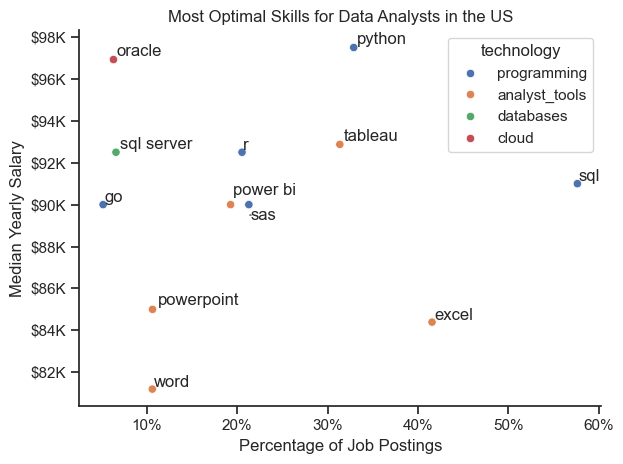

In [ ]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

#df_plot.plot(kind='scatter', x='skill_percent' , y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)
sns.despine()
sns.set_theme(style='ticks')
texts= []

for i, txt in enumerate(df_DA_skills_demand.index):
    x = df_DA_skills_demand['skill_percent'].iloc[i]
    y = df_DA_skills_demand['median_salary'].iloc[i]
    t = plt.text(x, y, txt)  # t is the Text object
    # Manual adjustment BEFORE adjust_text
    if txt.lower() == "power bi":  # use .lower() to be safe with capitalization
        t.set_position((x + 0.005, y + 200))  # move right & up
    if txt.lower() == "sas":
        t.set_position((x - 0.005, y - 500))  # move left & down
    texts.append(t)

ax=plt.gca()

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.xlabel('Percentage of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most Optimal Skills for Data Analysts in the US')

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.tight_layout()
plt.show()